In [1]:
import numpy as np
import seaborn as sns
sns.set()

In [2]:
temp = np.arange(5., 33, 2)
temp

array([ 5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25., 27., 29.,
       31.])

In [3]:
dt50_ref = 30.
theta_ref = 0.20
temp_ref = 20.0
beta2 = 0.45
beta_prime = 0.5

In [4]:
def theta_factor_a(theta_ref, theta_obs, beta2):
    return (theta_obs/theta_ref)**beta2

def theta_factor_b(theta_obs, beta_prime):
    WP = 0.19
    W100 = 0.43
    if theta_obs < 0.5*WP:
        return 0
    elif theta_obs <= W100:
        return ((theta_obs-0.5*WP)/(W100-WP))**beta_prime
    else:
        return 1

def temp_factor_arr(t_obs, t_ref):
    tk_obs = t_obs + 273.15
    tk_ref = t_ref + 273.15
    E_a = 23.91  # Kj/mol
    R = 0.008314  # mol Kelvin/ Kj
    return np.exp((E_a/R)*((1./tk_ref)-(1./tk_obs)))


def temp_factor_macro(t_obs, t_ref):
    E_a = 23.91  # Kj/mol
    R = 0.008314  # mol Kelvin/ Kj
    tk_ref = t_ref + 273.15
    tk_obs = t_obs + 273.15
    
    if t_obs <= 0.:
        return 0
    elif t_obs < 5.:
        return (t_obs/(5.))*np.exp((E_a/(R*tk_ref*tk_obs))*(tk_obs-tk_ref))
    else:
#         print("third clause")
        return np.exp((E_a/(R*tk_ref*tk_obs))*(tk_obs-tk_ref))
#         return np.exp((E_a/R)*((1./tk_ref)-(1./tk_obs)))


In [5]:
# Macro
t_obs = 1
tk_obs = t_obs + 273.15
test = 5 + 273.15

tk_ref = 20 + 273.15
E_a = 23.91  # Kj/mol
R = 0.008314  # mol Kelvin/ Kj
print("With factor ", (t_obs/(5.))*np.exp((E_a/(R*tk_ref*tk_obs))*(tk_obs-tk_ref)))
print("With factor and 5deg", (t_obs/(5.))*np.exp((E_a/(R*tk_ref*tk_obs))*(test-tk_ref)))
print("Without factor", np.exp((E_a/(R*tk_ref*tk_obs))*(tk_obs-tk_ref)))

print("Best solution is 'With factor', MACRO and Dairon have errors.")

('With factor ', 0.10133353655727484)
('With factor and 5deg', 0.11692751927533084)
('Without factor', 0.5066676827863742)
Best solution is 'With factor', MACRO and Dairon have errors.


In [6]:
theta_obs = .50
(theta_obs/theta_ref)**beta2

1.5103340164972456

In [7]:
t_obs = 10
tk_obs = t_obs + 273.15

np.exp((E_a/R)*(1./tk_ref - 1./tk_obs))

0.7071814699609018

# Plotting

In [8]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

## Option 1, $\theta$ equation 3.50 (Walker, 1974)

Walker, A. (1974). “A simulation model for prediction of herbicide persistence”. Journal of Envi- ronmental Quality 3, p. 396–401.

In [9]:
theta = np.arange(0.10,0.65, 0.05)
theta

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ])

In [10]:


x = []
y = []
z = []
for i in theta:
    for j in temp:
        x.append(round(i,3))
        y.append(float(j))
        k = round((np.log(2)/dt50_ref)*(min(1.,theta_factor_a(theta_ref, i, beta2)))*(temp_factor_macro(j, temp_ref)),5)
#         z.append(k)
        z.append(round((np.log(2)/float(k)),2))

In [11]:
d = {'Moisture': x, 'Temp': y, 'DT50':z}
df = pd.DataFrame(data=d)

In [12]:
df1 = df.pivot("Moisture", "Temp", "DT50")

In [13]:
df1

Temp,5.0,7.0,9.0,11.0,13.0,15.0,17.0,19.0,21.0,23.0,25.0,27.0,29.0,31.0
Moisture,,,,,,,,,,,,,,
0.10,69.52,64.60,60.06,55.90,52.08,48.57,45.36,42.37,39.63,37.11,34.76,32.60,30.60,28.74
0.15,57.96,53.82,50.05,46.58,43.40,40.49,37.79,35.31,33.02,30.92,28.97,27.16,25.49,23.95
0.20,50.93,47.28,43.98,40.94,38.13,35.56,33.20,31.03,29.01,27.16,25.45,23.87,22.40,21.04
0.25,50.93,47.28,43.98,40.94,38.13,35.56,33.20,31.03,29.01,27.16,25.45,23.87,22.40,21.04
0.30,50.93,47.28,43.98,40.94,38.13,35.56,33.20,31.03,29.01,27.16,25.45,23.87,22.40,21.04
0.35,50.93,47.28,43.98,40.94,38.13,35.56,33.20,31.03,29.01,27.16,25.45,23.87,22.40,21.04
0.40,50.93,47.28,43.98,40.94,38.13,35.56,33.20,31.03,29.01,27.16,25.45,23.87,22.40,21.04
0.45,50.93,47.28,43.98,40.94,38.13,35.56,33.20,31.03,29.01,27.16,25.45,23.87,22.40,21.04
0.50,50.93,47.28,43.98,40.94,38.13,35.56,33.20,31.03,29.01,27.16,25.45,23.87,22.40,21.04


In [14]:


iy1 = (0.4/theta.max())*len(theta)
ix1 = ((20.)/temp.max())*len(temp)

iy2 = (0.2/theta.max())*len(theta)
ix2 = ((30.)/temp.max())*len(temp)

iy3 = (0.4/theta.max())*len(theta)
ix3 = ((30.)/temp.max())*len(temp)


# ax.scatter(ix, iy, c= "green", marker='s', label="$\Delta$DT50 = -0.3 d.", s=80)

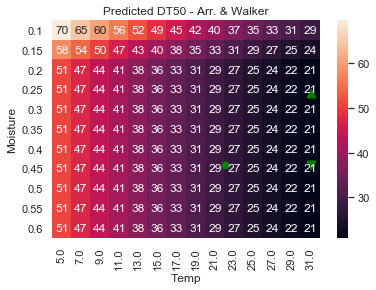

In [15]:
ax = plt.axes()
ax.set_title('Predicted DT50 - Arr. & Walker')
heat1 = sns.heatmap(df1, ax=ax, annot = True)



ax.scatter(ix1, iy1, c= "green", marker='.', label="$\Delta$DT50 = -0.1 d.", s=200)
ax.scatter(ix2, iy2, c= "green", marker='^', label="$\Delta$DT50 = -6.1 d.", s=80)
ax.scatter(ix3, iy3, c= "green", marker='v', label="$\Delta$DT50 = -0.3 d.", s=80)
# ax.legend(markerscale = 0.5, loc="lower right")
# ax.legend(ncol=1, bbox_to_anchor=(1.2, .55), markerscale = .8,
#            bbox_transform=plt.gcf().transFigure)
plt.show()

In [16]:
ax.get_ylim()

(11.0, 0.0)

In [17]:
ax.get_xlim()

(0.0, 14.0)

In [18]:
# figure = heat1.get_figure()    
# figure.savefig('heat1.pdf', dpi=400)

## Option 2, $\theta$ equation 3.52 (Scrholl et al., 2006)

Schroll, R., H. H. Becher, U. Dorfler, S. Gayler, H. P. Hartmann et J. Ruoss (2006). “Quantifying the effect of soil moisture on the aerobic microbial mineralization of selected pes- ticides in different soils”. Environmental Science & Technology 40.10, p. 3305–3312.
Schwen,

In [19]:
theta = np.arange(0.15,0.65, 0.05)
theta

array([0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ])

In [20]:
x = []
y = []
z = []

for i in theta:
    for j in temp:
        x.append(round(i,3))
        y.append(float(j))
        k = round((np.log(2)/dt50_ref)*(theta_factor_b(i, beta_prime))*(temp_factor_macro(j, temp_ref)),5)
#         z.append(k)
        z.append(round((np.log(2)/float(k)),2))

In [21]:
d = {'Moisture': x, 'Temp': y, 'DT50':z}
df = pd.DataFrame(data=d)
df2 = df.pivot("Moisture", "Temp", "DT50")

In [22]:
df2

Temp,5.0,7.0,9.0,11.0,13.0,15.0,17.0,19.0,21.0,23.0,25.0,27.0,29.0,31.0
Moisture,,,,,,,,,,,,,,
0.15,106.31,98.74,91.81,85.47,79.67,74.29,69.38,64.78,60.59,56.72,53.16,49.87,46.80,43.95
0.20,77.02,71.53,66.46,61.89,57.67,53.77,50.19,46.90,43.87,41.06,38.47,36.08,33.86,31.81
0.25,63.36,58.84,54.71,50.93,47.44,44.26,41.31,38.62,36.10,33.80,31.67,29.70,27.87,26.18
0.30,55.10,51.19,47.57,44.29,41.26,38.49,35.93,33.57,31.39,29.40,27.54,25.83,24.24,22.76
0.35,49.40,45.87,42.66,39.70,37.01,34.50,32.21,30.10,28.15,26.36,24.69,23.15,21.73,20.41
0.40,45.16,41.96,39.01,36.31,33.83,31.55,29.46,27.52,25.74,24.09,22.58,21.17,19.87,18.66
0.45,50.93,47.28,43.98,40.94,38.13,35.56,33.20,31.03,29.01,27.16,25.45,23.87,22.40,21.04
0.50,50.93,47.28,43.98,40.94,38.13,35.56,33.20,31.03,29.01,27.16,25.45,23.87,22.40,21.04
0.55,50.93,47.28,43.98,40.94,38.13,35.56,33.20,31.03,29.01,27.16,25.45,23.87,22.40,21.04


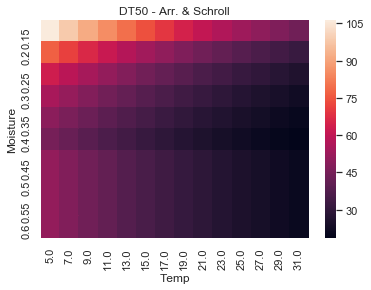

In [23]:
ax = plt.axes()
ax.set_title('DT50 - Arr. & Schroll')
heat2 = sns.heatmap(df2)  
plt.show()

In [24]:
# fig2 = heat2.get_figure() 
# fig2.savefig('heat2.png', dpi=400)

In [25]:
yticks = df2.index
keptticks = yticks[::int(len(yticks)/10)]
yticks = ['' for y in yticks]
yticks[::int(len(yticks)/10)] = keptticks

xticks = df2.columns
keptticks = xticks[::int(len(xticks)/10)]
xticks = ['' for y in xticks]
xticks[::int(len(xticks)/10)] = keptticks

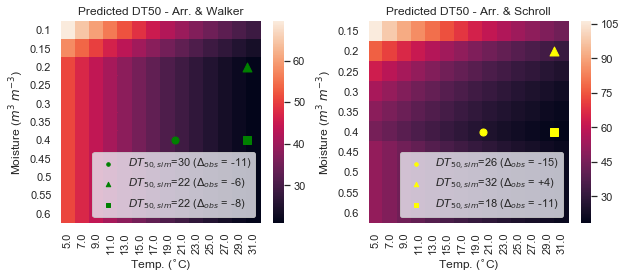

In [36]:
sns.set_context("paper")
sns.set(rc={'figure.figsize':(10.0, 4.)}) # Width, height, inches

fig, ax = plt.subplots(1, 2, sharex=False, sharey=False)

# ax = plt.axes()
ax[0].set_title('Predicted DT50 - Arr. & Walker')
heat1 = sns.heatmap(df1, ax=ax[0])
ax[0].scatter(8, 6.5, c= "green", marker='.', label="$DT_{50, sim}$=30 ($\Delta_{obs}$ = -11)", s=200) # 20-C, 40
ax[0].scatter(13., 2.5, c= "green", marker='^', label="$DT_{50, sim}$=22 ($\Delta_{obs}$ = -6)", s=80) # 30-C, 20
ax[0].scatter(13., 6.5, c= "green", marker='s', label="$DT_{50, sim}$=22 ($\Delta_{obs}$ = -8)", s=80) # 30-C, 40
ax[0].legend(loc = 'lower right', markerscale = 0.5)
ax[0].set_ylabel("Moisture ($m^{3}$ $m^{-3}$)")
ax[0].set_xlabel("Temp. ($^{\circ}$C)")

ax[1].set_title('Predicted DT50 - Arr. & Schroll')
heat2 = sns.heatmap(df2, ax=ax[1], yticklabels=yticks,xticklabels=xticks)
ax[1].scatter(8., 5.5, c= "yellow", marker='.', label="$DT_{50, sim}$=26 ($\Delta_{obs}$ = -15)", s=200) # 20-C, 40
ax[1].scatter(13., 1.5, c= "yellow", marker='^', label="$DT_{50, sim}$=32 ($\Delta_{obs}$ = +4)", s=80) # 30-C, 20
ax[1].scatter(13., 5.5, c= "yellow", marker='s', label="$DT_{50, sim}$=18 ($\Delta_{obs}$ = -11)", s=80) # 30-C, 40
ax[1].legend(loc = 'lower right', markerscale = 0.5)
ax[1].set_ylabel("Moisture ($m^{3}$ $m^{-3}$)")
ax[1].set_xlabel("Temp. ($^{\circ}$C)")

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.yticks(rotation=0)

plt.subplots_adjust(left=None, bottom=.2, right=None, top=.9,
                wspace=0.23, hspace=None)
plt.show()
fig.savefig('heats.pdf', dpi=400)